# Convert Bylot forcing files to CLASSIC
https://cccma.gitlab.io/classic/makeInputFiles.html

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
import os

## Bylot Island, Canadian high Arctic

The site is a low-center polygon, with herb tundra and no erect vegetation

| Short name | byl |
|:-----------|:----|
| Location | 73.1504ºN, 80.0046ºW |
| Elevation | 25 m |
| Snow-free albedo | - |
| Simulation period | 11 July 2013 to 25 June 2019 |
| Temperature/humidity measurement height | 2.3 m |
| Wind measurement height | 2.3 m |
| Reference | Domine et al. ([2021](https://essd.copernicus.org/articles/13/4331/2021/)) |

In [2]:
site = 'byl'
site_longname = 'Bylot Island, Canadian high Arctic'

year_start = '2013'
year_end = '2019'

lat = 73.1504
lon = -80.0046

path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot'
path_tmp = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/tmp'
path_out = '/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/'+site
path_out_CLASSIC = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/'+site+'/forcing'

if os.path.exists(path_out):
    print(path_out+' already exist.')
else:
    os.makedirs(path_out)
    print(path_out+' has been created!')

if os.path.exists(path_out_CLASSIC):
    print(path_out_CLASSIC+' already exist.')
else:
    os.makedirs(path_out_CLASSIC)
    print(path_out_CLASSIC+' has been created!')

/home/lalandmi/Dropbox/data/SnowMIP/forcing/CLASSIC/byl already exist.
/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/byl/forcing already exist.


### Open original forcing file

In [3]:
ds = xr.open_dataset(path+'/met_insitu_'+site+'_'+year_start+'_'+year_end+'.nc')
ds

<xarray.Dataset> Size: 4MB
Dimensions:  (time: 52202)
Coordinates:
  * time     (time) datetime64[ns] 418kB 2013-07-11T09:00:00 ... 2019-06-25T1...
Data variables:
    Wind     (time) float64 418kB ...
    Tair     (time) float64 418kB ...
    Qair     (time) float64 418kB ...
    LWdown   (time) float64 418kB ...
    SWdown   (time) float64 418kB ...
    Psurf    (time) float64 418kB ...
    Rainf    (time) float64 418kB ...
    Snowf    (time) float64 418kB ...

## Repalce SH by alternative calculation

In [5]:
path_SH = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot/ERA5'

In [7]:
df = pd.read_excel(path_SH+'/DataML_bis.xlsx', parse_dates=['time, UTC'])
df.set_index('time, UTC', inplace=True)
df

,"ERA 5 pressure, kPa",Air Temp. °C,RH values,"Specific humidity, g kg-1","Specific humidity new, g kg-1",RH ice,"Specific humidity bis, g kg-1"
"time, UTC",,,,,,,
2013-07-11 14:00:00,100.667453,6.819953,90.539907,5.559297,5.555353,90.539907,5.555353
2013-07-11 15:00:00,100.639789,6.957644,88.377942,5.479365,5.475476,88.377942,5.475476
2013-07-11 16:00:00,100.666109,8.925269,89.255245,6.329087,6.324599,89.255245,6.324599
2013-07-11 17:00:00,100.663687,10.422386,88.422344,6.936189,6.931274,88.422344,6.931274
2013-07-11 18:00:00,100.665562,8.218802,87.315260,5.900548,5.896362,87.315260,5.896362
...,...,...,...,...,...,...,...
2025-03-23 10:00:00,101.304578,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-23 11:00:00,101.356172,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-23 12:00:00,101.381453,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['ERA 5 pressure, kPa', 'Air Temp. °C', 'RH values',
       'Specific humidity,  g kg-1', 'Specific humidity new,  g kg-1',
       'RH ice', 'Specific humidity bis, g kg-1'],
      dtype='object')

In [20]:
ds2 = df.to_xarray()
ds2 = ds2.rename({'time, UTC': 'time'})
#convert to local time
ds2['time'] = ds2.time - pd.Timedelta(hours=5)
ds2

<xarray.Dataset> Size: 7MB
Dimensions:                         (time: 102553)
Coordinates:
  * time                            (time) datetime64[ns] 820kB 2013-07-11T09...
Data variables:
    ERA 5 pressure, kPa             (time) float64 820kB 100.7 100.6 ... 101.4
    Air Temp. °C                    (time) float64 820kB 6.82 6.958 ... nan nan
    RH values                       (time) float64 820kB 90.54 88.38 ... nan nan
    Specific humidity,  g kg-1      (time) float64 820kB 5.559 5.479 ... nan nan
    Specific humidity new,  g kg-1  (time) float64 820kB 5.555 5.475 ... nan nan
    RH ice                          (time) float64 820kB 90.54 88.38 ... nan nan
    Specific humidity bis, g kg-1   (time) float64 820kB 5.555 5.475 ... nan nan

In [21]:
ds2['Specific humidity bis, g kg-1']

<xarray.DataArray 'Specific humidity bis, g kg-1' (time: 102553)> Size: 820kB
array([5.55535254, 5.47547606, 6.32459932, ...,        nan,        nan,
              nan])
Coordinates:
  * time     (time) datetime64[ns] 820kB 2013-07-11T09:00:00 ... 2025-03-23T0...

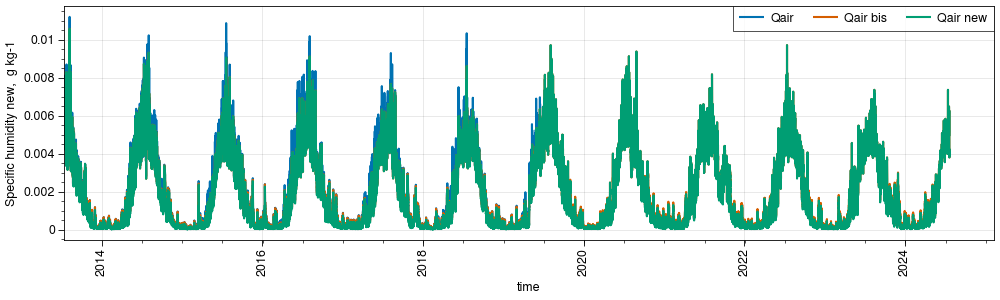

In [34]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,3))

(ds.Qair).plot(ax=axs[0], label='Qair')
(ds2['Specific humidity bis, g kg-1']*1e-3).plot(ax=axs[0], label='Qair bis')
# (ds2['Specific humidity,  g kg-1']*1e-3).plot(ax=axs[0], label='Qair')
(ds2['Specific humidity new,  g kg-1']*1e-3).plot(ax=axs[0], label='Qair new')
axs.legend()

In [37]:
ds2['Specific humidity bis, g kg-1'].sel(time=ds.time)

<xarray.DataArray 'Specific humidity bis, g kg-1' (time: 52202)> Size: 418kB
array([5.55535254, 5.47547606, 6.32459932, ..., 4.1138703 , 4.12783922,
       3.64450895])
Coordinates:
  * time     (time) datetime64[ns] 418kB 2013-07-11T09:00:00 ... 2019-06-25T1...

In [38]:
ds_new = ds.copy()
ds_bis = ds.copy()

In [39]:
ds_new['Qair'] = ds2['Specific humidity new,  g kg-1']*1e-3
ds_bis['Qair'] = ds2['Specific humidity bis, g kg-1']*1e-3

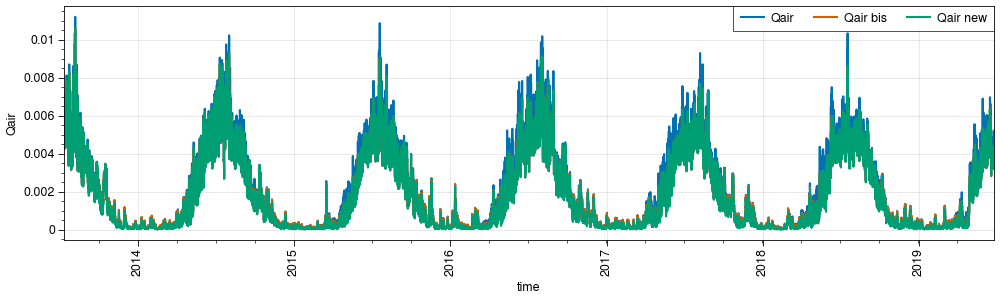

In [41]:
%matplotlib widget
fig, axs = pplt.subplots(figsize=(10,3))

(ds.Qair).plot(ax=axs[0], label='Qair')
(ds_bis.Qair).plot(ax=axs[0], label='Qair bis')
(ds_new.Qair).plot(ax=axs[0], label='Qair new')
axs.legend()

## Keep going

In [206]:
ds.time.encoding

{'dtype': dtype('int64'),
 'zlib': False,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot/met_insitu_byl_2013_2019.nc',
 'original_shape': (52202,),
 'units': 'hours since 2013-07-11 09:00:00',
 'calendar': 'proleptic_gregorian'}

In [207]:
# Check if there are leap years
ds.sel(time='2016-02')

<xarray.Dataset> Size: 50kB
Dimensions:  (time: 696)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2016-02-01 ... 2016-02-29T23:00:00
Data variables:
    Wind     (time) float64 6kB ...
    Tair     (time) float64 6kB -38.94 -39.86 -39.01 ... -27.46 -29.23 -26.26
    Qair     (time) float64 6kB ...
    LWdown   (time) float64 6kB ...
    SWdown   (time) float64 6kB ...
    Psurf    (time) float64 6kB ...
    Rainf    (time) float64 6kB ...
    Snowf    (time) float64 6kB 0.0 0.0 0.0 1.887e-05 0.0 ... 0.0 0.0 0.0 0.0

### Resample to 30 minute time step for CLASSIC
Otherwise CLASSIC interpolates the forcing by itself and makes some assumptions more adapted for 6h forcing files
(e.g., for the SWdown that will lose the peaks)

In [42]:
ds_30min = ds.resample(time='30min').interpolate()
ds_30min

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 104403)
Coordinates:
  * time     (time) datetime64[ns] 835kB 2013-07-11T09:00:00 ... 2019-06-25T1...
Data variables:
    Wind     (time) float64 835kB 1.53 1.468 1.405 1.713 ... 1.45 1.292 1.135
    Tair     (time) float64 835kB 6.82 6.889 6.958 7.941 ... 10.43 9.809 9.186
    Qair     (time) float64 835kB 0.005626 0.005593 ... 0.004688 0.004424
    LWdown   (time) float64 835kB 308.9 304.3 299.7 294.6 ... 253.9 255.9 257.9
    SWdown   (time) float64 835kB 250.9 280.7 310.5 491.6 ... 580.8 629.9 679.0
    Psurf    (time) float64 835kB 1.002e+05 1.002e+05 ... 1.015e+05 1.015e+05
    Rainf    (time) float64 835kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Snowf    (time) float64 835kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [43]:
ds_bis_30min = ds_bis.resample(time='30min').interpolate()
ds_bis_30min

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 104403)
Coordinates:
  * time     (time) datetime64[ns] 835kB 2013-07-11T09:00:00 ... 2019-06-25T1...
Data variables:
    Wind     (time) float64 835kB 1.53 1.468 1.405 1.713 ... 1.45 1.292 1.135
    Tair     (time) float64 835kB 6.82 6.889 6.958 7.941 ... 10.43 9.809 9.186
    Qair     (time) float64 835kB 0.005555 0.005515 ... 0.003886 0.003645
    LWdown   (time) float64 835kB 308.9 304.3 299.7 294.6 ... 253.9 255.9 257.9
    SWdown   (time) float64 835kB 250.9 280.7 310.5 491.6 ... 580.8 629.9 679.0
    Psurf    (time) float64 835kB 1.002e+05 1.002e+05 ... 1.015e+05 1.015e+05
    Rainf    (time) float64 835kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Snowf    (time) float64 835kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [44]:
ds_new_30min = ds_new.resample(time='30min').interpolate()
ds_new_30min

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 104403)
Coordinates:
  * time     (time) datetime64[ns] 835kB 2013-07-11T09:00:00 ... 2019-06-25T1...
Data variables:
    Wind     (time) float64 835kB 1.53 1.468 1.405 1.713 ... 1.45 1.292 1.135
    Tair     (time) float64 835kB 6.82 6.889 6.958 7.941 ... 10.43 9.809 9.186
    Qair     (time) float64 835kB 0.005555 0.005515 ... 0.003886 0.003645
    LWdown   (time) float64 835kB 308.9 304.3 299.7 294.6 ... 253.9 255.9 257.9
    SWdown   (time) float64 835kB 250.9 280.7 310.5 491.6 ... 580.8 629.9 679.0
    Psurf    (time) float64 835kB 1.002e+05 1.002e+05 ... 1.015e+05 1.015e+05
    Rainf    (time) float64 835kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Snowf    (time) float64 835kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

### Extend beginning and the end of the forcing
Because CLASSIC only accept full years (will need to be removed for analyses)

In [45]:
time_ext = pd.date_range(
    pd.to_datetime(ds_30min.time.dt.year[0], format='%Y'), 
    str(ds_30min.time.dt.year[-1].values.item(0))+'-12-31 23:30:00',
    freq='30min'
)
time_ext

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 00:30:00',
               '2013-01-01 01:00:00', '2013-01-01 01:30:00',
               '2013-01-01 02:00:00', '2013-01-01 02:30:00',
               '2013-01-01 03:00:00', '2013-01-01 03:30:00',
               '2013-01-01 04:00:00', '2013-01-01 04:30:00',
               ...
               '2019-12-31 19:00:00', '2019-12-31 19:30:00',
               '2019-12-31 20:00:00', '2019-12-31 20:30:00',
               '2019-12-31 21:00:00', '2019-12-31 21:30:00',
               '2019-12-31 22:00:00', '2019-12-31 22:30:00',
               '2019-12-31 23:00:00', '2019-12-31 23:30:00'],
              dtype='datetime64[ns]', length=122688, freq='30T')

In [46]:
ds_30min_ext = ds_30min.reindex(time=time_ext)
ds_30min_ext

<xarray.Dataset> Size: 9MB
Dimensions:  (time: 122688)
Coordinates:
  * time     (time) datetime64[ns] 982kB 2013-01-01 ... 2019-12-31T23:30:00
Data variables:
    Wind     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Tair     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Qair     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    LWdown   (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    SWdown   (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Psurf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Rainf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Snowf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan

In [47]:
ds_new_30min_ext = ds_new_30min.reindex(time=time_ext)
ds_new_30min_ext

<xarray.Dataset> Size: 9MB
Dimensions:  (time: 122688)
Coordinates:
  * time     (time) datetime64[ns] 982kB 2013-01-01 ... 2019-12-31T23:30:00
Data variables:
    Wind     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Tair     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Qair     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    LWdown   (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    SWdown   (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Psurf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Rainf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Snowf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan

In [48]:
ds_bis_30min_ext = ds_bis_30min.reindex(time=time_ext)
ds_bis_30min_ext

<xarray.Dataset> Size: 9MB
Dimensions:  (time: 122688)
Coordinates:
  * time     (time) datetime64[ns] 982kB 2013-01-01 ... 2019-12-31T23:30:00
Data variables:
    Wind     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Tair     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Qair     (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    LWdown   (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    SWdown   (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Psurf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Rainf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan
    Snowf    (time) float64 982kB nan nan nan nan nan ... nan nan nan nan nan

In [49]:
# ds_30min    : XXXXXXXXXXXXXXXXXXXXXXXXXXXX........... i_start_next_year ....... i_end_next_year
# ds_30min_ext: 1rst jan .... i_before_start

i_before_start = ds_30min_ext.sel(time=slice(None,ds_30min.time[0])).time.size - 1 
i_start_next_year = ds_30min.sel(time=slice(None, year_start)).time.size
i_end_next_year = i_start_next_year + i_before_start

# Check the dimensions are right before replacement
np.testing.assert_equal(
    ds_30min_ext['Wind'][:i_before_start].size,
    ds_30min['Wind'][i_start_next_year:i_end_next_year].size
)

for key in list(ds.keys()):
    ds_30min_ext[key][:i_before_start] = ds_30min[key][i_start_next_year:i_end_next_year].values

In [50]:
# ds_30min    : i_start_prev_year ....... i_end_prev_year.......XXXXXXXXXXXXXXXXXXXXXXXXXXXX
# ds_30min_ext: ............................................... i_after_end.......... 31 dec

i_after_end = ds_30min_ext.sel(time=slice(ds_30min.time[-1]+1, None)).time.size
i_end_prev_year = ds_30min.time.sel(time=slice(year_end, None)).time.size
i_start_prev_year = i_end_prev_year + i_after_end

# Check the dimensions are right before replacement
np.testing.assert_equal(
    ds_30min_ext['Wind'][-i_after_end:].size,
    ds_30min['Wind'][-i_start_prev_year:-i_end_prev_year].size
)

for key in list(ds.keys()):
    ds_30min_ext[key][-i_after_end:] = ds_30min[key][-i_start_prev_year:-i_end_prev_year].values

In [51]:
# ds_30min    : XXXXXXXXXXXXXXXXXXXXXXXXXXXX........... i_start_next_year ....... i_end_next_year
# ds_30min_ext: 1rst jan .... i_before_start

i_before_start = ds_new_30min_ext.sel(time=slice(None,ds_new_30min.time[0])).time.size - 1 
i_start_next_year = ds_new_30min.sel(time=slice(None, year_start)).time.size
i_end_next_year = i_start_next_year + i_before_start

# Check the dimensions are right before replacement
np.testing.assert_equal(
    ds_new_30min_ext['Wind'][:i_before_start].size,
    ds_new_30min['Wind'][i_start_next_year:i_end_next_year].size
)

for key in list(ds.keys()):
    ds_new_30min_ext[key][:i_before_start] = ds_new_30min[key][i_start_next_year:i_end_next_year].values

In [52]:
# ds_30min    : i_start_prev_year ....... i_end_prev_year.......XXXXXXXXXXXXXXXXXXXXXXXXXXXX
# ds_30min_ext: ............................................... i_after_end.......... 31 dec

i_after_end = ds_new_30min_ext.sel(time=slice(ds_new_30min.time[-1]+1, None)).time.size
i_end_prev_year = ds_new_30min.time.sel(time=slice(year_end, None)).time.size
i_start_prev_year = i_end_prev_year + i_after_end

# Check the dimensions are right before replacement
np.testing.assert_equal(
    ds_new_30min_ext['Wind'][-i_after_end:].size,
    ds_new_30min['Wind'][-i_start_prev_year:-i_end_prev_year].size
)

for key in list(ds.keys()):
    ds_new_30min_ext[key][-i_after_end:] = ds_new_30min[key][-i_start_prev_year:-i_end_prev_year].values

In [53]:
# ds_30min    : XXXXXXXXXXXXXXXXXXXXXXXXXXXX........... i_start_next_year ....... i_end_next_year
# ds_30min_ext: 1rst jan .... i_before_start

i_before_start = ds_bis_30min_ext.sel(time=slice(None,ds_bis_30min.time[0])).time.size - 1 
i_start_next_year = ds_bis_30min.sel(time=slice(None, year_start)).time.size
i_end_next_year = i_start_next_year + i_before_start

# Check the dimensions are right before replacement
np.testing.assert_equal(
    ds_bis_30min_ext['Wind'][:i_before_start].size,
    ds_bis_30min['Wind'][i_start_next_year:i_end_next_year].size
)

for key in list(ds.keys()):
    ds_bis_30min_ext[key][:i_before_start] = ds_bis_30min[key][i_start_next_year:i_end_next_year].values

In [54]:
# ds_30min    : i_start_prev_year ....... i_end_prev_year.......XXXXXXXXXXXXXXXXXXXXXXXXXXXX
# ds_30min_ext: ............................................... i_after_end.......... 31 dec

i_after_end = ds_bis_30min_ext.sel(time=slice(ds_bis_30min.time[-1]+1, None)).time.size
i_end_prev_year = ds_bis_30min.time.sel(time=slice(year_end, None)).time.size
i_start_prev_year = i_end_prev_year + i_after_end

# Check the dimensions are right before replacement
np.testing.assert_equal(
    ds_bis_30min_ext['Wind'][-i_after_end:].size,
    ds_bis_30min['Wind'][-i_start_prev_year:-i_end_prev_year].size
)

for key in list(ds.keys()):
    ds_bis_30min_ext[key][-i_after_end:] = ds_bis_30min[key][-i_start_prev_year:-i_end_prev_year].values

### Convert time from relative to absolute
https://sourceforge.net/p/nco/discussion/9830/thread/175b4c98e1/?limit=25

The time format `day as %Y%m%d.%f` is <mark>**required** by CLASSIC</mark>

Note: you need CDO installed to run the next cell (`!` allow to run bash command in the notebook)

In [56]:
ds_new_30min_ext.to_netcdf(path_tmp+'/met_insitu_'+site+'_30min_SH_new'+year_start+'_'+year_end+'.nc')

In [57]:
!cdo -a -f nc copy {path_tmp}/met_insitu_{site}_30min_SH_new{year_start}_{year_end}.nc {path_tmp}/met_insitu_{site}_30min_SH_new{year_start}_{year_end}_a.nc

cdo    copy:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    copy: Processed 981504 values from 8 variables over 122688 timesteps [10.32s 731MB]


In [58]:
ds_bis_30min_ext.to_netcdf(path_tmp+'/met_insitu_'+site+'_30min_SH_bis'+year_start+'_'+year_end+'.nc')

In [59]:
!cdo -a -f nc copy {path_tmp}/met_insitu_{site}_30min_SH_bis{year_start}_{year_end}.nc {path_tmp}/met_insitu_{site}_30min_SH_bis{year_start}_{year_end}_a.nc

cdo    copy:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    copy: Processed 981504 values from 8 variables over 122688 timesteps [11.91s 731MB]


## Open the new file with absolute time

In [60]:
ds_new = xr.open_dataset(path_tmp+'/met_insitu_'+site+'_30min_SH_new'+year_start+'_'+year_end+'_a.nc')
ds_new

<xarray.Dataset> Size: 9MB
Dimensions:  (time: 122688)
Coordinates:
  * time     (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
Data variables:
    Wind     (time) float64 982kB ...
    Tair     (time) float64 982kB ...
    Qair     (time) float64 982kB ...
    LWdown   (time) float64 982kB ...
    SWdown   (time) float64 982kB ...
    Psurf    (time) float64 982kB ...
    Rainf    (time) float64 982kB ...
    Snowf    (time) float64 982kB ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 14 10:18:53 2025: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [61]:
ds_bis = xr.open_dataset(path_tmp+'/met_insitu_'+site+'_30min_SH_bis'+year_start+'_'+year_end+'_a.nc')
ds_bis

<xarray.Dataset> Size: 9MB
Dimensions:  (time: 122688)
Coordinates:
  * time     (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
Data variables:
    Wind     (time) float64 982kB ...
    Tair     (time) float64 982kB ...
    Qair     (time) float64 982kB ...
    LWdown   (time) float64 982kB ...
    SWdown   (time) float64 982kB ...
    Psurf    (time) float64 982kB ...
    Rainf    (time) float64 982kB ...
    Snowf    (time) float64 982kB ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 14 10:19:12 2025: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [63]:
ds_new.time

<xarray.DataArray 'time' (time: 122688)> Size: 982kB
array([20130101.      , 20130101.020833, 20130101.041667, ..., 20191231.9375  ,
       20191231.958333, 20191231.979167])
Coordinates:
  * time     (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T

### Add the lat/lon dimensions of the site (<mark>required by CLASSIC</mark>)

Note: the values of the coordinates does not seem to matter for CLASSIC (the attributes neither)

In [64]:
ds_new = ds_new.assign_coords(lon=lon)
ds_new = ds_new.expand_dims('lon')
ds_new['lon'] = ds_new.lon.assign_attrs(
    standard_name='Longitude',
    units='degrees_east',
    axis='X'
)

ds_new = ds_new.assign_coords(lat=lat)
ds_new = ds_new.expand_dims('lat')
ds_new['lat'] = ds_new.lat.assign_attrs(
    standard_name='Latitude',
    units='degrees_north',
    axis='Y'
)

# Transpose the dimension to put the time first (as required by CLASSIC)
ds_new = ds_new.transpose('time', 'lat', 'lon')

ds_new

<xarray.Dataset> Size: 9MB
Dimensions:  (time: 122688, lat: 1, lon: 1)
Coordinates:
  * time     (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
  * lon      (lon) float64 8B -80.0
  * lat      (lat) float64 8B 73.15
Data variables:
    Wind     (time, lat, lon) float64 982kB 0.134 0.105 0.076 ... 0.369 0.271
    Tair     (time, lat, lon) float64 982kB -39.72 -39.49 ... -28.13 -28.01
    Qair     (time, lat, lon) float64 982kB 4.868e-05 4.979e-05 ... 0.0002028
    LWdown   (time, lat, lon) float64 982kB 162.2 162.3 162.3 ... 170.2 166.9
    SWdown   (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Psurf    (time, lat, lon) float64 982kB 1.012e+05 1.012e+05 ... 1.011e+05
    Rainf    (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Snowf    (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 14 10:18:53 2025: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [65]:
ds_bis = ds_bis.assign_coords(lon=lon)
ds_bis = ds_bis.expand_dims('lon')
ds_bis['lon'] = ds_bis.lon.assign_attrs(
    standard_name='Longitude',
    units='degrees_east',
    axis='X'
)

ds_bis = ds_bis.assign_coords(lat=lat)
ds_bis = ds_bis.expand_dims('lat')
ds_bis['lat'] = ds_bis.lat.assign_attrs(
    standard_name='Latitude',
    units='degrees_north',
    axis='Y'
)

# Transpose the dimension to put the time first (as required by CLASSIC)
ds_bis = ds_bis.transpose('time', 'lat', 'lon')

ds_bis

<xarray.Dataset> Size: 9MB
Dimensions:  (time: 122688, lat: 1, lon: 1)
Coordinates:
  * time     (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
  * lon      (lon) float64 8B -80.0
  * lat      (lat) float64 8B 73.15
Data variables:
    Wind     (time, lat, lon) float64 982kB 0.134 0.105 0.076 ... 0.369 0.271
    Tair     (time, lat, lon) float64 982kB -39.72 -39.49 ... -28.13 -28.01
    Qair     (time, lat, lon) float64 982kB 7.243e-05 7.391e-05 ... 0.0002676
    LWdown   (time, lat, lon) float64 982kB 162.2 162.3 162.3 ... 170.2 166.9
    SWdown   (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Psurf    (time, lat, lon) float64 982kB 1.012e+05 1.012e+05 ... 1.011e+05
    Rainf    (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Snowf    (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 14 10:19:12 2025: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

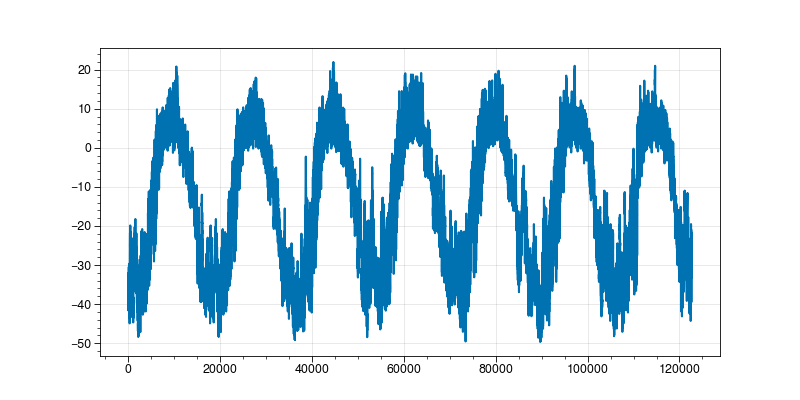

In [66]:
%matplotlib widget
plt.figure(figsize=(8,4))
plt.plot(ds_new.Tair.squeeze().values)

### Add Rainf and Snowf (<mark>required by CLASSIC</mark>)

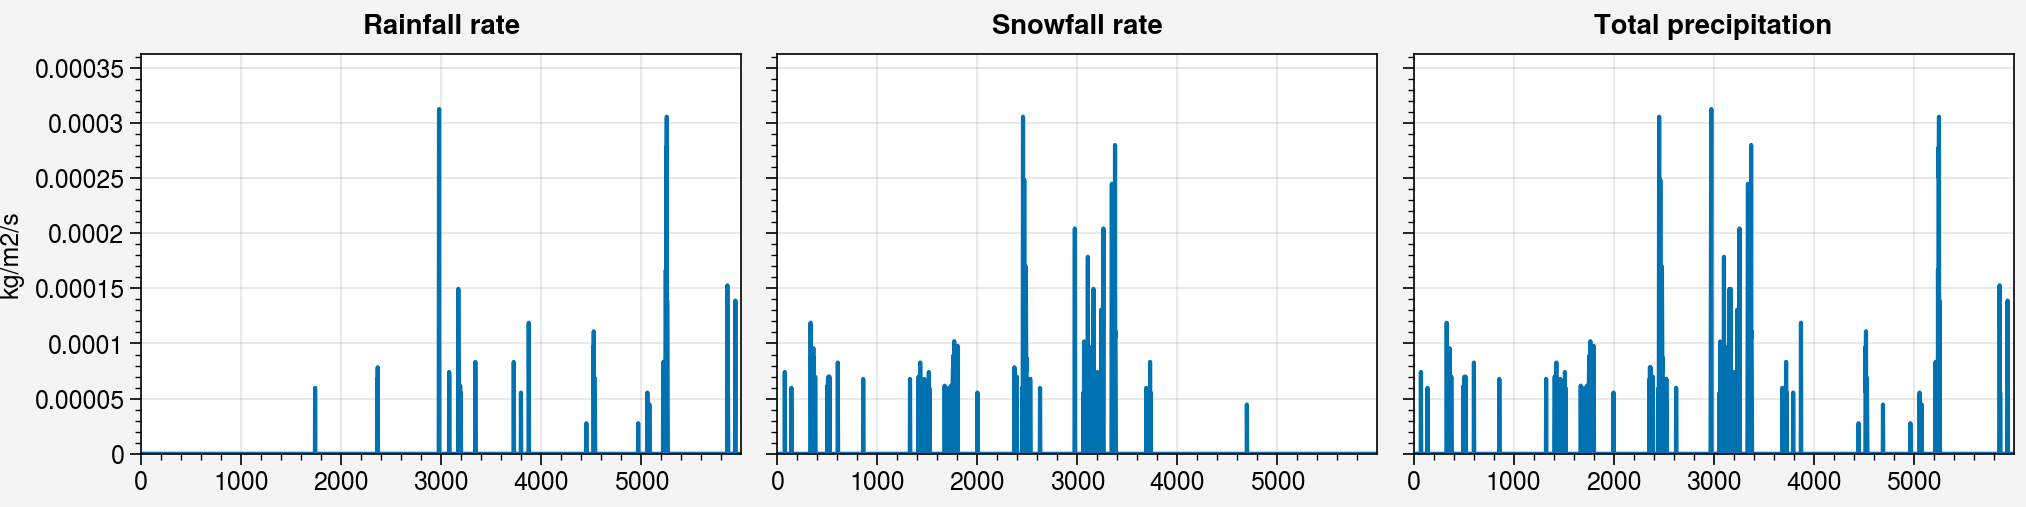

In [67]:
%matplotlib inline
fig, axs = pplt.subplots(ncols=3, nrows=1, refaspect=1.5, refwidth=3)

i_start = 2000*2
i_end = 5000*2

axs[0].plot(ds_new.Rainf.squeeze().values[i_start:i_end])
axs[1].plot(ds_new.Snowf.squeeze().values[i_start:i_end])
axs[2].plot(ds_new.Rainf.squeeze().values[i_start:i_end] + ds_new.Snowf.squeeze().values[i_start:i_end])

for ax in axs:
    ax.format(
        ylabel=ds_new.Rainf.attrs['units'], 
        ylim=(0,max(ds_new.Rainf.squeeze().values[i_start:i_end] + ds_new.Snowf.squeeze().values[i_start:i_end]).item(0) + 0.00005)
    )
    
axs.format(
    collabels=[ds_new.Rainf.attrs['long_name'], ds_new.Snowf.attrs['long_name'], 'Total precipitation']
)


In [68]:
ds_new['TotPrecip'] = ds_new.Rainf + ds_new.Snowf
ds_new.TotPrecip.attrs['long_name'] = 'Total precipitaion rate (Rainf + Snowf)'
ds_new.TotPrecip.attrs['units'] = ds_new.Rainf.attrs['units']
ds_new

<xarray.Dataset> Size: 10MB
Dimensions:    (time: 122688, lat: 1, lon: 1)
Coordinates:
  * time       (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
  * lon        (lon) float64 8B -80.0
  * lat        (lat) float64 8B 73.15
Data variables:
    Wind       (time, lat, lon) float64 982kB 0.134 0.105 0.076 ... 0.369 0.271
    Tair       (time, lat, lon) float64 982kB -39.72 -39.49 ... -28.13 -28.01
    Qair       (time, lat, lon) float64 982kB 4.868e-05 4.979e-05 ... 0.0002028
    LWdown     (time, lat, lon) float64 982kB 162.2 162.3 162.3 ... 170.2 166.9
    SWdown     (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Psurf      (time, lat, lon) float64 982kB 1.012e+05 1.012e+05 ... 1.011e+05
    Rainf      (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Snowf      (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TotPrecip  (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 14 10:18:53 2025: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [69]:
ds_bis['TotPrecip'] = ds_bis.Rainf + ds_bis.Snowf
ds_bis.TotPrecip.attrs['long_name'] = 'Total precipitaion rate (Rainf + Snowf)'
ds_bis.TotPrecip.attrs['units'] = ds_bis.Rainf.attrs['units']
ds_bis

<xarray.Dataset> Size: 10MB
Dimensions:    (time: 122688, lat: 1, lon: 1)
Coordinates:
  * time       (time) float64 982kB 2.013e+07 2.013e+07 ... 2.019e+07 2.019e+07
  * lon        (lon) float64 8B -80.0
  * lat        (lat) float64 8B 73.15
Data variables:
    Wind       (time, lat, lon) float64 982kB 0.134 0.105 0.076 ... 0.369 0.271
    Tair       (time, lat, lon) float64 982kB -39.72 -39.49 ... -28.13 -28.01
    Qair       (time, lat, lon) float64 982kB 7.243e-05 7.391e-05 ... 0.0002676
    LWdown     (time, lat, lon) float64 982kB 162.2 162.3 162.3 ... 170.2 166.9
    SWdown     (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Psurf      (time, lat, lon) float64 982kB 1.012e+05 1.012e+05 ... 1.011e+05
    Rainf      (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Snowf      (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    TotPrecip  (time, lat, lon) float64 982kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Apr 14 10:19:12 2025: cdo -a -f nc copy /home/lalandmi/...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

## Save forcing files

CLASSIC **requires** <mark>one file per forcing variable</mark>

Note: I save the files directly to CLASSIC folder and here to keep more flexibility in the future

In [73]:
for key in list(ds_new.keys()):
    ds_new[key].to_netcdf(path_out+'/met_insitu_'+site+'_30min_SH_new'+year_start+'_'+year_end+'_'+key+'.nc')
    ds_new[key].to_netcdf(path_out_CLASSIC+'/met_insitu_'+site+'_30min_SH_new'+year_start+'_'+year_end+'_'+key+'.nc')

In [74]:
for key in list(ds_bis.keys()):
    ds_bis[key].to_netcdf(path_out+'/met_insitu_'+site+'_30min_SH_bis'+year_start+'_'+year_end+'_'+key+'.nc')
    ds_bis[key].to_netcdf(path_out_CLASSIC+'/met_insitu_'+site+'_30min_SH_bis'+year_start+'_'+year_end+'_'+key+'.nc')

In [75]:
!ls {path_out}

met_insitu_byl_0.4xERA5precip_30min_2014_2018_Snowf.nc
met_insitu_byl_0.4xERA5precip_30min_2014_2018_TotPrecip.nc
met_insitu_byl_0.5xERA5precip_30min_2014_2018_Snowf.nc
met_insitu_byl_0.5xERA5precip_30min_2014_2018_TotPrecip.nc
met_insitu_byl_0.6xERA5precip_30min_2014_2018_Snowf.nc
met_insitu_byl_0.6xERA5precip_30min_2014_2018_TotPrecip.nc
met_insitu_byl_0.7xERA5precip_30min_2014_2018_Snowf.nc
met_insitu_byl_0.7xERA5precip_30min_2014_2018_TotPrecip.nc
met_insitu_byl_1.3SWd_2014_2018_LWdown.nc
met_insitu_byl_1.3SWd_2014_2018_Psurf.nc
met_insitu_byl_1.3SWd_2014_2018_Qair.nc
met_insitu_byl_1.3SWd_2014_2018_Rainf.nc
met_insitu_byl_1.3SWd_2014_2018_Snowf.nc
met_insitu_byl_1.3SWd_2014_2018_SWdown.nc
met_insitu_byl_1.3SWd_2014_2018_Tair.nc
met_insitu_byl_1.3SWd_2014_2018_TotPrecip.nc
met_insitu_byl_1.3SWd_2014_2018_Wind.nc
met_insitu_byl_2014_2018_LWdown.nc
met_insitu_byl_2014_2018_Psurf.nc
met_insitu_byl_2014_2018_Qair.nc
met_insitu_byl_2014_2018_Rainf.nc
met_insitu_byl_2014_2018_Snowf.nc
me

In [203]:
!ls {path_out_CLASSIC}

met_insitu_byl_1.3SWd_2014_2018_LWdown.nc
met_insitu_byl_1.3SWd_2014_2018_Psurf.nc
met_insitu_byl_1.3SWd_2014_2018_Qair.nc
met_insitu_byl_1.3SWd_2014_2018_Rainf.nc
met_insitu_byl_1.3SWd_2014_2018_Snowf.nc
met_insitu_byl_1.3SWd_2014_2018_SWdown.nc
met_insitu_byl_1.3SWd_2014_2018_Tair.nc
met_insitu_byl_1.3SWd_2014_2018_TotPrecip.nc
met_insitu_byl_1.3SWd_2014_2018_Wind.nc
met_insitu_byl_2014_2018_LWdown.nc
met_insitu_byl_2014_2018_Psurf.nc
met_insitu_byl_2014_2018_Qair.nc
met_insitu_byl_2014_2018_Rainf.nc
met_insitu_byl_2014_2018_Snowf.nc
met_insitu_byl_2014_2018_SWdown.nc
met_insitu_byl_2014_2018_Tair.nc
met_insitu_byl_2014_2018_TotPrecip.nc
met_insitu_byl_2014_2018_Wind.nc
met_insitu_byl_30min_2014_2018_LWdown.nc
met_insitu_byl_30min_2014_2018_Psurf.nc
met_insitu_byl_30min_2014_2018_Qair.nc
met_insitu_byl_30min_2014_2018_Rainf.nc
met_insitu_byl_30min_2014_2018_Snowf.nc
met_insitu_byl_30min_2014_2018_SWdown.nc
met_insitu_byl_30min_2014_2018_Tair.nc
met_insitu_byl_30min_2014_2018_TotPreci

### Keep the same initial files from Ref run (but redo spinup)

In [208]:
# path_init = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/'+site
# exp2 = 'peat_30min_ext'
# # exp2 = 'Ref_30min_ext'
# !cp {path_init}/{site}_init_spinup_Ref.nc {path_init}/{site}_init_spinup_{exp2}.nc
# !cp {path_init}/rsfile_spinup_Ref.nc {path_init}/rsfile_spinup_{exp2}.nc

In [209]:
!mkdir /home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/{site}/spinup_{exp2}